**Analiza povprečnih plač v Sloveniji (2008–2022)**

Ta Jupyter Notebook analizira podatke o povprečnih plačah v Sloveniji na podlagi različnih dejavnikov, kot so regija, starost in spol. Podatke smo pridobili iz OPSI (Odprti podatki Slovenije).

**Podatkovni sklop vsebuje:**
- Regije (12 regij Slovenije)
- Starostne skupine (npr. 15–24, 25–34, ...)
- Spol (moški, ženske)
- Leto (2008–2022)
- Povprečno mesečno plačo

**Cilji analize:**
1. Kako so se povprečne plače spreminjale skozi leta?
2. Kakšne so razlike v plačah med spoloma v različnih regijah?
3. Kako močno starost vpliva na plačo v posamezni regiji?

pip install pyaxis

In [1]:
from pyaxis import pyaxis
import pandas as pd

# Pot do .px datoteke
fp = r"0711322S.px"

# Uvoz v UTF-8 in slovenščina
px = pyaxis.parse(uri=fp, encoding='utf-8', lang='sl')

# Podatki v DataFrame
data_df = px['DATA']

# Kratek pregled
print(data_df.head())

# Shrani v CSV z UTF-8 BOM za združljivost (npr. z Excelom)
data_df.to_csv("placa_utf8.csv", index=False, encoding='utf-8-sig')

Multilingual PX file
  STATISTIČNA REGIJA           STAROST           SPOL  LETO  PLAČA  \
0          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   
1          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   
2          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   
3          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   
4          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   

           MERITVE  DATA  
0        Povprečje  1427  
1          Mediana   NaN  
2  Spodnji kvartil   NaN  
3  Zgornji kvartil   NaN  
4    10. percentil   NaN  


  STATISTIČNA REGIJA           STAROST           SPOL  LETO  PLAČA  \
0          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   
1          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   
2          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   
3          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   
4          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   

           MERITVE  DATA  
0        Povprečje  1427  
1          Mediana   NaN  
2  Spodnji kvartil   NaN  
3  Zgornji kvartil   NaN  
4    10. percentil   NaN  
[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022]


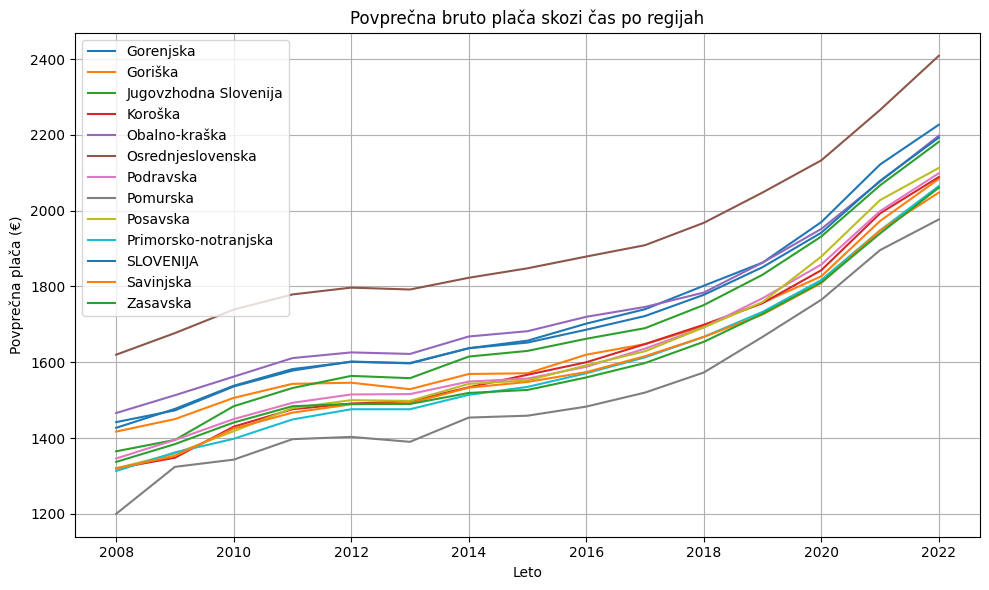

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Uvoz podatkov iz CSV datoteke
data_df = pd.read_csv("placa_utf8.csv")

# Preverimo prvih nekaj vrstic
print(data_df.head())

# Filtriramo samo relevantne stolpce
filtered_df = data_df[(data_df['STAROST'] == 'Starost - SKUPAJ') &
                       (data_df['SPOL'] == 'Spol - SKUPAJ') &
                        (data_df['PLAČA'] == 'Bruto') &
                       (data_df['MERITVE'] == 'Povprečje')]

# Preverimo, ali so v stolpcu "LETO" nenavadne vrednosti
print(filtered_df["LETO"].unique())

# Pretvorimo LETO v številke (če so v formatu, ki ni številka)
filtered_df.loc[:, "LETO"] = pd.to_numeric(filtered_df["LETO"], errors='coerce')

# Pretvorimo tudi "DATA" v število, če ni v pravilnem formatu
filtered_df.loc[:, "DATA"] = pd.to_numeric(filtered_df["DATA"], errors='coerce')

# Odstranimo vrstice, kjer je LETO ali DATA NaN
filtered_df = filtered_df.dropna(subset=["LETO", "DATA"])

# Sortiramo podatke po regiji in letu
filtered_df = filtered_df.sort_values(by=["STATISTIČNA REGIJA", "LETO"])

# Risanje grafa za bruto plače po regijah skozi čas
plt.figure(figsize=(10, 6))
for region in filtered_df["STATISTIČNA REGIJA"].unique():
    region_df = filtered_df[filtered_df["STATISTIČNA REGIJA"] == region]
    plt.plot(region_df["LETO"], region_df["DATA"], label=region)

plt.title("Povprečna bruto plača skozi čas po regijah")
plt.xlabel("Leto")
plt.ylabel("Povprečna plača (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
